## Esteban Limón Ochoa 

## Método de aceptación rechazo

Este método surgió debido a que muchas distribuciones continuas, no era factible aplicar el método de transformación inversa porque $x= F^{-1}(U)$ no se puede calcular (o al menos no es computacionalmente eficientemente).Con frecuencia, estos métodos son considerablemente más rápidos que el método de transformación inversa. Ahora ilustramos el **método de aceptación y rechazo** en un ejemplo simple.

Suponga que tenemos una función de densidad de probabilidad (PDF) de una distribución beta, la cual viene dada:
$$f(x)=\frac{x^{\alpha_1-1}(1-x)^{\alpha_2-1}}{B(\alpha_1,\alpha_2)} \quad x\in[0,1] \longrightarrow B(\alpha_1,\alpha_2)\equiv \int_{0}^{1}x^{\alpha_1-1}(1-x)^{\alpha_2-1}, \ \alpha_1,\alpha_2>1$$

**Hablar de las desventajas**

Ahora definiremos formalmente el método:

*Note que $f(x)$ debe ser una función acotada y con dominio finito* $a\leq x \leq b$ como se muestra a continuación:
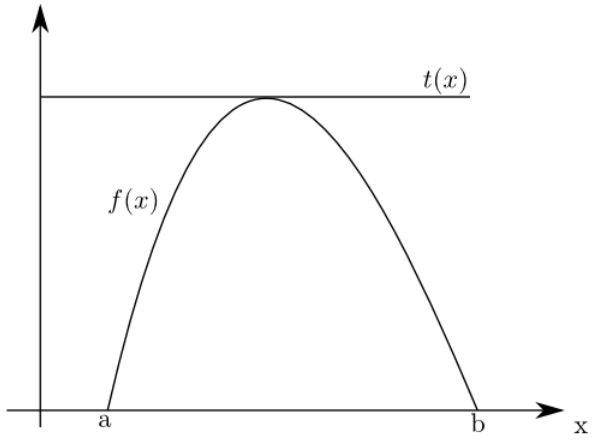

De acuerdo a esta función $f(x)$ el método propone los siguientes pasos. Asuma que podemos encontrar una función $t(x)$ tal que
$$t(x)\geq f(x), \quad \forall x$$
Note que la función $t(x)\geq 0$  no es una PDF debido a 
$$\int_{-\infty}^{\infty}t(x)dx\geq \int_{-\infty}^{\infty}f(x)dx =1$$
Tomemos
$$c=\int_{-\infty}^{\infty}t(x)\geq 1$$
definamos la función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**. Resultando entonces 
$$\frac{f(x)}{g(x)}\leq c,\quad \forall x$$
El siguiente algoritmo genera una variable aleatoria $X$, distribuida de acuerdo a la densidad $f(x)$
   1. Generar $R_1$ teniendo densidad $g(x)$ 
   2. Generar $R_2 \rightarrow U \sim U(0,1)$ independiente de $R_1$ del paso 1 .
   3. Evaluar la función de probabilidad en $R_1$.
   4. Determinar si la siguiente desigualdad se cumple: $$R_2\leq \frac{f(R_1)}{t(R_1)}$$
   Si la respuesta es afirmativa se utiliza $X=R_1$, de lo contrario es necesario pasar nuevamente al paso 1, tantas veces como sea necesario.

> Se puede demostrar que la $P(aceptar)=1/c$

### Ejemplo 1: Función beta

$$f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                 (1 - x)^{\beta - 1}$$

###  a). Caso particular: $\alpha=\beta=3$
Con estos valores la PDF es 
$$f(x)=30(x^2-2x^3+x^4)$$

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np
from pynverse import inversefunc
# %matplotlib notebook
%matplotlib inline

In [2]:
# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()

El máximo de f es: [1.875]


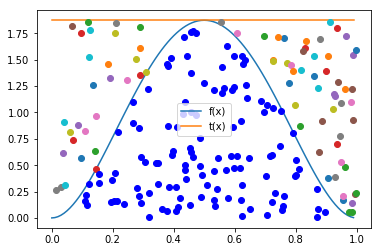

In [3]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

###  b). Caso general: $\alpha,\beta>0$ 

El máximo de la función es: 3.5848168690361635


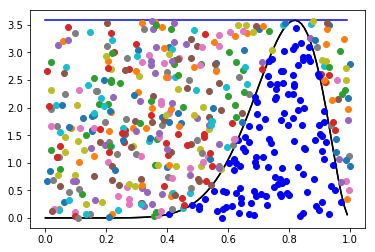

In [4]:
# Parámetros de la función beta
a =10; b=3
N = 500  # número de puntos
# Función objetivo
f = lambda x: beta.pdf(x,a,b)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

x = np.arange(0,1,0.01)
t = lambda x: c*np.ones(len(x))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

plt.show()

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
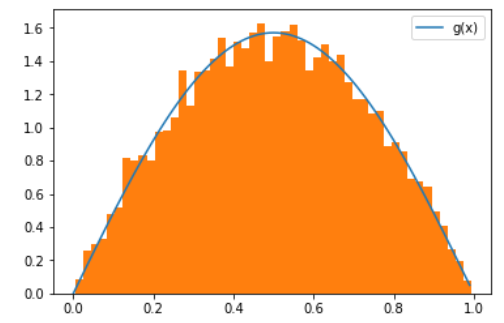

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

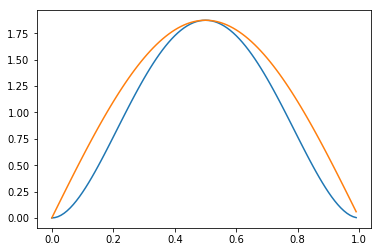

In [5]:
#1

N = 200
f= lambda x: 30*(x**2-2*x**3+x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: c*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
# plt.legend()
# R1 = np.random.rand(N)
# R2 = np.random.rand(N)
# f_x = f(R1)
# t_x = t(R1)
# condicion = np.multiply(R2,t_x) <= f_x
# for i in range(N):
#     if condicion[i]:
#         plt.plot(R1[i],R2[i]*t_x[i],'ob')#puntos que estan dentro de f(x)
#     else:
#         plt.plot(R1[i],R2[i]*t_x[i],'or')#puntos que estan dentro del t(x) y fuera de f(x)
# plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

#2 
Sabemos que:
$$g(x)=\frac{t(x)}{c}$$
Proponemos una función:
T(x), que es igual a 
$$t(x)=y = a \sin(\pi x), \quad -a\leq y\leq a $$
Sabemos que el método de aceptación y rechazo nos dicta que la función que se plantea debe de ser integrada entre [0,1]. Por lo que lo planteamos de esta manera:

$$ \int_{0}^{1} a *\sin(\pi x) dx $$
$$= a \int_{0}^{1} \sin(\pi x) dx $$
$$= \frac{a}{\pi} (-\cos(\pi x))$$ Evaluado de [0,1]
$$= \frac{a}{\pi} (1-\cos(\pi x))$$Evaluado de [0,1]
Evaluamos los valores de la integral definida:
$$=\frac{a}{\pi}*(1-(-1)))$$
$$=\frac{2a}{\pi}$$

Por lo que la integral nos resulta 
$$c=\int_{0}^{1} a *\sin(\pi x) dx =\frac{2a}{\pi}$$

Por lo que g(x)
$$g(x)=\frac{t(x)}{c}=\frac{a\pi\sin(\pi x)}{2a}=\frac{\pi\sin(\pi x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

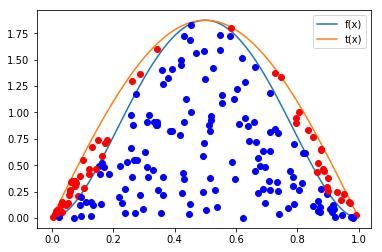

In [6]:
#3
N = 200
f= lambda x: 30*(x**2-2*x**3+x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: c*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')#puntos que estan dentro de f(x)
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'or')#puntos que estan dentro del t(x) y fuera de f(x)
plt.show()

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:


(array([0.20720039, 0.31080058, 0.20720039, 0.41440077, 0.31080058,
        0.82880154, 0.82880154, 0.93240174, 0.51800096, 0.82880154,
        1.13960212, 0.93240174, 1.4504027 , 0.82880154, 1.76120328,
        0.93240174, 2.38280444, 1.03600193, 1.76120328, 2.07200386,
        2.17560405, 1.4504027 , 1.03600193, 1.34680251, 1.24320232,
        1.4504027 , 1.13960212, 1.03600193, 1.03600193, 1.24320232,
        1.03600193, 1.4504027 , 1.55400289, 1.4504027 , 1.24320232,
        1.4504027 , 1.24320232, 1.13960212, 1.03600193, 1.34680251,
        1.13960212, 0.93240174, 1.34680251, 1.03600193, 0.10360019,
        0.31080058, 0.20720039, 0.31080058, 0.31080058, 0.31080058]),
 array([0.01584263, 0.03514761, 0.0544526 , 0.07375758, 0.09306256,
        0.11236755, 0.13167253, 0.15097751, 0.1702825 , 0.18958748,
        0.20889246, 0.22819745, 0.24750243, 0.26680741, 0.2861124 ,
        0.30541738, 0.32472236, 0.34402735, 0.36333233, 0.38263731,
        0.4019423 , 0.42124728, 0.44055226, 0.

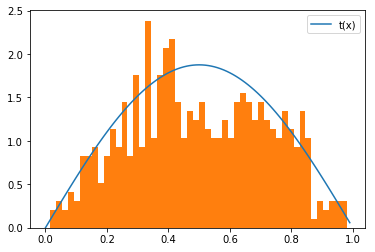

In [7]:
#4
def ddens(b,N):
    return (1/np.pi)*np.arccos(1-np.pi*np.random.uniform(0,2*b/np.pi,N)/b)
N = 500
f= lambda x: 30*(x**2-2*x**3+x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: c*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
# plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = ddens(c,N)
R2 = ddens(c,N)
f_x = f(R1)

plt.hist(R1,bins=50,density=True)

# t_x = t(R1)
# condicion = np.multiply(R2,t_x) <= f_x
# for i in range(N):
#     if condicion[i]:
#         plt.plot(R1[i],R2[i]*t_x[i],'ob')#puntos que estan dentro de f(x)
#     else:
#         plt.plot(R1[i],R2[i]*t_x[i],'or')#puntos que estan dentro del t(x) y fuera de f(x)
# plt.show()

(array([0.43921149, 0.21960575, 0.21960575, 0.21960575, 0.32940862,
        0.32940862, 0.98822585, 0.76862011, 1.09802873, 1.31763447,
        1.09802873, 1.64704309, 1.2078316 , 1.31763447, 0.43921149,
        1.86664884, 1.86664884, 1.31763447, 1.75684596, 1.31763447,
        1.86664884, 1.42743734, 1.2078316 , 1.97645171, 1.31763447,
        1.31763447, 1.64704309, 1.86664884, 1.64704309, 1.31763447,
        0.65881724, 1.53724022, 1.64704309, 1.42743734, 1.75684596,
        1.31763447, 1.53724022, 0.87842298, 0.87842298, 0.54901436,
        0.98822585, 0.98822585, 1.2078316 , 0.98822585, 0.98822585,
        0.43921149, 0.43921149, 0.98822585, 0.21960575, 0.10980287]),
 array([0.04297048, 0.06118494, 0.0793994 , 0.09761386, 0.11582832,
        0.13404278, 0.15225724, 0.1704717 , 0.18868616, 0.20690061,
        0.22511507, 0.24332953, 0.26154399, 0.27975845, 0.29797291,
        0.31618737, 0.33440183, 0.35261629, 0.37083075, 0.38904521,
        0.40725967, 0.42547413, 0.44368859, 0.

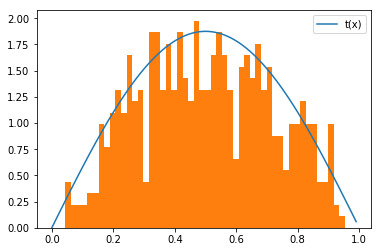

In [8]:
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.hist(R2,bins=50,density=True)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
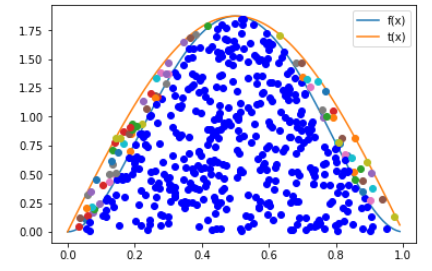

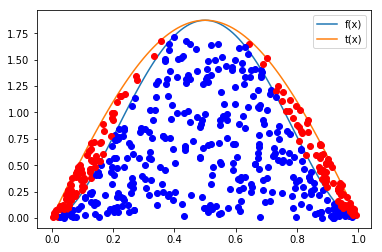

In [9]:
N = 500
f = lambda x: 30*(x**2-2*x**3+x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: c*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
minfx=0
mintx=0
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')#puntos que estan dentro de f(x)
        minfx+=1
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'or')#puntos que estan dentro del t(x) y fuera de f(x)
        mintx+=1
plt.show()

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [10]:
minfx
mintx
tot=minfx+mintx
print('Los valores de la funcion t(x) constante son: ',minfx,'.', 'Mientras que ',tot,'son los valores de t(x) senosoidal.')
print('En la barrera entre la funcion senosoidal y la funcion constante hubo ',mintx,' valores.')
promfx=minfx/tot;promtx=mintx/tot
print('El promedio de numeros que quedo dentro de la funcion constante es de: ',promfx)
print('El promedio de numeros que quedo entre la función senosoidaly la constante es de: ',promtx)

Los valores de la funcion t(x) constante son:  329 . Mientras que  500 son los valores de t(x) senosoidal.
En la barrera entre la funcion senosoidal y la funcion constante hubo  171  valores.
El promedio de numeros que quedo dentro de la funcion constante es de:  0.658
El promedio de numeros que quedo entre la función senosoidaly la constante es de:  0.342


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

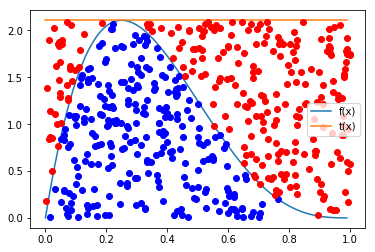

[2.109375]  es el máximo de la función f(x)


In [11]:
N = 500
f = lambda x: 20*x*(1-x)**3
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
x = np.arange(0,1,0.01)
t=lambda x:c*np.ones(len(x))
#t=lambda x: c*np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
minfx=0
mintx=0
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')#puntos que estan dentro de f(x)
        minfx+=1
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'or')#puntos que estan dentro del t(x) y fuera de f(x)
        mintx+=1
plt.show()
print(c,' es el máximo de la función f(x)')

In [12]:
minfx
mintx
tot=minfx+mintx
print('Los valores de la funcion t(x) constante son: ',minfx,'.', 'Mientras que ',tot,'son los valores de t(x) linea sobre el máximo.')
print('En la barrera entre la funcion senosoidal y la funcion constante hubo ',mintx,' valores.')
promfx=minfx/tot;promtx=mintx/tot
print('El promedio de numeros que quedo dentro de la funcion constante es de: ',promfx)
print('El promedio de numeros que quedo entre la función senosoidaly la constante es de: ',promtx)

Los valores de la funcion t(x) constante son:  258 . Mientras que  500 son los valores de t(x) linea sobre el máximo.
En la barrera entre la funcion senosoidal y la funcion constante hubo  242  valores.
El promedio de numeros que quedo dentro de la funcion constante es de:  0.516
El promedio de numeros que quedo entre la función senosoidaly la constante es de:  0.484


In [13]:
len(x)

100

## Parámetros de entrega
Voy a habilitar un link en moodle donde deben de subir su cuaderno de python con la sulución de los problemas planteados de manera individual. Esta tarea valdrá el doble de las anteriores y la podrán entregar a mas tardar el miércoles 3 de octubre a las 5 pm.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Z.
</footer>

In [14]:
invtan=inversefunc(np.tan,domain=[-np.pi/2,np.pi/2],open_domain=True)
invtan(x)


array([1.29246971e-26, 9.99966674e-03, 1.99973340e-02, 2.99910049e-02,
       3.99786871e-02, 4.99583957e-02, 5.99281551e-02, 6.98860016e-02,
       7.98299857e-02, 8.97581741e-02, 9.96686524e-02, 1.09559527e-01,
       1.19428926e-01, 1.29275004e-01, 1.39095942e-01, 1.48889948e-01,
       1.58655262e-01, 1.68390157e-01, 1.78092938e-01, 1.87761946e-01,
       1.97395560e-01, 2.06992194e-01, 2.16550304e-01, 2.26068388e-01,
       2.35544981e-01, 2.44978663e-01, 2.54368059e-01, 2.63711834e-01,
       2.73008703e-01, 2.82257422e-01, 2.91456794e-01, 3.00605670e-01,
       3.09702944e-01, 3.18747560e-01, 3.27738506e-01, 3.36674818e-01,
       3.45555578e-01, 3.54379921e-01, 3.63147011e-01, 3.71856074e-01,
       3.80506377e-01, 3.89097231e-01, 3.97627991e-01, 4.06098058e-01,
       4.14506874e-01, 4.22853926e-01, 4.31138740e-01, 4.39360887e-01,
       4.47519975e-01, 4.55615653e-01, 4.63647608e-01, 4.71615567e-01,
       4.79519291e-01, 4.87358579e-01, 4.95133263e-01, 5.02843211e-01,
      